Due to the deluge of “expert” opinion online regarding the Phil VP race, we decided to do our own due diligence in the search for the truth. Special thanks to Reina Reyes for the [dataset](https://gist.github.com/reinareyes/b32fc96972bbb9c3d0a9d754ab02d024).

In the context of the data that are readily available, we want an approach that is quick and simple. In our opinion, the data that we have would not be sufficient to prove whether or not fraud was committed, but the data would be useful in verifying whether or not BBM’s claim is reasonable.

BBM claims that at some point in time (~roughly 3AM of May 10th, Phil time) the transmitted data were rigged, making way for Leni’s eventual lead in the VP race. One nice feature of such a claim that we can exploit is that there are effectively two sets of data, separated in time: (1) a set of clean, “un-manufactured” data (i.e. votes transmitted prior to ~3AM), and (2) a set of fraudulent, manufactured data (i.e. votes transmitted after ~3AM).

From a statistical standpoint, datasets have underlying distributions, dependent upon the fundamental process(es) that generated the dataset. To manufacture data, one must go to great lengths to preserve the underlying distributions of the data. Aside from the difficulty of generating fake data that have the same underlying distributions of the real data, you need to have prior knowledge of these distributions, so you would be able to preserve them. And such a feat is non-trivial, especially in a “process” as intricate as the Philippine elections -- with data still continuously pouring in (See this [paper](http://www.pnas.org/content/109/41/16469.full) for example). 

While brainstorming for possible underlying distributions, we decided to check whether the transmitted election counts data are consistent with Benford’s Law, which is useful in fraud detection<sup>[1](http://www.journalofaccountancy.com/Issues/1999/May/nigrini)</sup>, for the very reason that “people who make up figures tend to distribute their digits fairly uniformly”<sup>[2](http://www.tandfonline.com/doi/abs/10.1080/00031305.1972.10478934)</sup>.  (A quick intro to [Benford’s Law](https://en.wikipedia.org/wiki/Benford%27s_law) can be found in Wikipedia.)

## What is Benford’s Law?

In essence, Benford’s Law says that leading significant digits of a collection of numbers follow a certain discrete distribution. Note that it is not a "law" in the same sense as Newton's Law of Gravity is. Rather, it is a "law" in the sense that it has been observed so many times in nature. Examples of real-life datasets demonstrating Benford's law are physical constants, atomic weights, human population, Fibonacci numbers, etc. 

## Does the dataset obey Benford’s Law?

To better understand the ‘first-digit’ statistic relevant to Benford’s Law, consider the table below. The table on the left shows the first few transmissions coming from ARMM. The last column ‘leading_digit’ gives the first digit of the numerical value of the ‘votes’ column. The number of times a given leading digit occurs is listed in the ‘frequency’ column on the right table, which we then divide (i.e normalize) by the total number of transmissions, which in this case is twenty (i.e 20 rows). 

![alt text](https://scontent-dfw1-1.xx.fbcdn.net/l/t31.0-8/p720x720/13246235_10153822543308051_8918865709790372371_o.jpg "Table 1: An example dataset showing twenty transmissions from ARMM.")
Table 1: An example dataset showing twenty transmissions from ARMM.

Figure 1 depicts the time evolution of the votes for both VP candidates. The blue line marks 3AM (05-10-16), when Leni's votes were about to overtake BBM's. Now we implement the method just described to this entire data set, and we get a result that is clearly consistent with Benford’s Law.

![alt text](https://scontent-dfw1-1.xx.fbcdn.net/t31.0-8/s2048x2048/13217522_10153820961333051_4942588677885484901_o.jpg "Figure 1: Cumulative Votes")
Figure 1: Left: Cumulative number of votes as a function of time. The blue line (3AM, May 10th, 2016) marks the approximate time when Leni was about to overtake BBM. Right: The corresponding first-digit histogram of the vote counts per transmission normalized by the total number of transmissions for both BBM and Leni. The observed first-digit distribution is clearly consistent with Benford’s law (green curve).


## I know what you did around 3AM?

Now we ask the question: Is it reasonable for  BBM to claim that the "true" and unmanipulated election numbers lie only on the left side of this blue line, whilst those on the right, are the result of systematic manipulation? If it were true, we expect the vote counts on left side to follow Benford's law. On the other hand, those on the right would be distributed uniformly, again because statistically  "people who make up figures tend to distribute their digits fairly uniformly", or at least different from what is expected from  Benford’s Law. 
We show in Figure 2 that the first-digit distribution of votes transmitted PRIOR (left) to 3AM of May 10th, 2016 are virtually the same as the votes transmitted for AFTER (right) 3AM. Both consistent to Benford’s law at a high level of significance implies that nothing anomalous is evident.

![alt text](https://scontent-dfw1-1.xx.fbcdn.net/t31.0-8/13246445_10153820968678051_6440630978423568735_o.jpg "Figure 2: Pre and Post 3AM data")
Figure 2: First-Digit distributions of ALL transmitted votes. Left: PRIOR to 3AM (May 10, 2016). Right: AFTER 3AM (May 10, 2016). Both distributions are essentially the same, consistent to Benford’s Law.

We show in Figure 2 that the first-digit distribution of votes transmitted PRIOR (left) to 3AM of May 10th, 2016 are virtually the same as the votes transmitted for AFTER (right) 3AM. Both consistent to Benford’s law at a high level of significance  implies that nothing anomalous is evident.

![alt text](https://scontent-dfw1-1.xx.fbcdn.net/t31.0-8/p720x720/13247834_10153820998498051_4203486656982646698_o.jpg "Figure 3: Pre and Post 3AM data separated by candidate")
Figure 3: Top Left: BBM’s first-digit distribution for the number of votes transmitted PRIOR to 3AM of May 10th. Top Right: BBM’s first-digit distribution for the number of votes transmitted AFTER 3AM (05-10-2016). Bottom Left: Leni’s first-digit distribution for the number of votes transmitted PRIOR to 3AM. Bottom Right: Leni’s first-digit distribution for the number of votes transmitted AFTER to 3AM. Qualitatively, all curves are consistent with Benford’s Law.

We go a little further and subdivide the votes by time and by candidate. From Figure 3, qualitatively, the distributions of the first-digits of the votes transmitted match quite well with what we expect from Benford’s Law. A series of quick hypothesis-testing (via the chi-square statistic) for all plots strongly indicate that the expected and observed distributions are essentially the same. This implies that BBM’s and Leni’s vote counts have the essentially the same first-digit distribution.

## What about during other times?

We extend the analysis further and subdivide the data into two-hour intervals. The results, compiled into a  GIF image below. Any drastic change would have been an indication of a potential anomaly. The small changes in between time steps are expected since subdividing the data further into smaller time intervals naturally results to  sparsity in the samples.

![alt text](https://raw.githubusercontent.com/gmsardane/Phil-VP-Elections/master/git_distribution_new.gif "Figure 4: First digit distribution per 2-hour window")

## So what now?

Therefore, we contend that BBM’s claim is UNLIKELY to be true. Note, however, that not all election data will necessarily follow Benford’s law. It would not be appropriate to draw conclusions of fraud (or non-fraud) solely on the basis comparisons relative to Benford’s Law. What's unique about the 2016 VP election, however, is that BBM claims that the initial transmissions (conveniently, when he was winning) were honest, but then ‘suddenly’ became rigged, as a result of some unscrupulous act. What we have shown is that the first-digit distributions are all consistent to the same expected distribution, and no evidence of anomalous deviations is apparent. 
Though still a possibility, an act of number-manufacturing that was able to preserve the first-digit distribution of the transmitted votes, at various times, in DOTA-speak, is “beyond godlike”.


## An Addendum

For the curious, what about the last-digit distribution? Benford’s Law? Common sense tells us a flat distribution, and indeed this is what we see. The distributions prior to 3AM (May 10th, 2016) are consistent with those after 3AM, which are in turn consistent to the same uniform distribution. This, by itself, is an additional quick check in support of the argument above against BBM’s claim.

![alt text](https://scontent-dfw1-1.xx.fbcdn.net/t31.0-8/p720x720/13221314_10153821008408051_1591194826537221291_o.jpg "Figure 4: Last Digit Distribution")
Top Left: BBM’s last-digit distribution for the number of votes transmitted PRIOR to 3AM of May 10th. Top Right: BBM’s last-digit distribution for the number of votes transmitted AFTER to 3AM of May 10th. Bottom Left: Leni’s last-digit distribution for the number of votes transmitted PRIOR to 3AM of May 10th. Bottom Right: Leni’s last-digit distribution of the number of votes transmitted AFTER to 3AM of May 10th. Qualitatively, all curves are consistent with a uniform distribution, as expected.

## IPython Notebook used to generate plots

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

from scipy.stats import chisquare

import scipy.stats as ss
%matplotlib inline

In [3]:
#read data from csv
data = pd.read_csv('VP_election_tallies.csv', parse_dates=[["date", "time"]])
data.sort_values(['region', 'candidate', 'date_time'], inplace=True)

In [4]:
#computed transmitted data
data = data[['date_time', 'candidate', 'region', 'count', 'increment']]
data['count_shift'] = data['count'].diff(periods=1)
data['ref'] = (data.candidate == data.candidate.shift(1)) & (data.region == data.region.shift(1)) 
data['transmitted_votes'] = data.count_shift*data.ref + data['count']*(~data.ref) 
print data[['candidate', 'region', 'count', 'count_shift', 'ref', 'transmitted_votes']][97:110]
data = data[(data.transmitted_votes>0)]

    candidate region    count  count_shift    ref  transmitted_votes
513      Leni    CAR   109018       2324.0   True             2324.0
551      Leni    CAR   109921        903.0   True              903.0
589      Leni    CAR   109921          0.0   True                0.0
4         BBM    NCR  1972875    1862954.0  False          1972875.0
42        BBM    NCR  2029716      56841.0   True            56841.0
80        BBM    NCR  2042715      12999.0   True            12999.0
118       BBM    NCR  2042715          0.0   True                0.0
156       BBM    NCR  2059239      16524.0   True            16524.0
194       BBM    NCR  2059239          0.0   True                0.0
232       BBM    NCR  2072344      13105.0   True            13105.0
270       BBM    NCR  2072344          0.0   True                0.0
629       BBM    NCR  2095573      23229.0   True            23229.0
667       BBM    NCR  2101255       5682.0   True             5682.0


In [5]:
#define cut (2016/5/9 3am)
cut = datetime.datetime(2016, 5, 10, 3, 0)

In [6]:
#clean data and separate at the defined cut
data_after_3am = data[(data.date_time>=cut)&(data.transmitted_votes>0)]
data_before_3am = data[(data.date_time<cut)&(data.transmitted_votes>0)]

#get votes
votes_before_3am = data_before_3am['transmitted_votes'].tolist()
votes_after_3am = data_after_3am['transmitted_votes'].tolist()
votes_before_3am = data_before_3am['transmitted_votes'].tolist()
votes_after_3am = data_after_3am['transmitted_votes'].tolist()
votes_leni_before_3am = data_before_3am[data_before_3am.candidate=='Leni']['transmitted_votes'].tolist()
votes_leni_after_3am = data_after_3am[data_after_3am.candidate=='Leni']['transmitted_votes'].tolist()
votes_bbm_before_3am = data_before_3am[data_before_3am.candidate=='BBM']['transmitted_votes'].tolist()
votes_bbm_after_3am = data_after_3am[data_after_3am.candidate=='BBM']['transmitted_votes'].tolist()

In [7]:
#define digit retriever
def get_digits(votes):
    """Retrieves first and last digit of a number"""
    first_digits = []
    last_digits = []
    for i in votes:
        first_digits.append(int(str(int(i))[0]))
        last_digits.append(int(str(int(i))[-1]))
    return first_digits, last_digits

In [8]:
#store first and last digits of the votes
first_digits_before_3am, last_digits_before_3am = get_digits(votes_before_3am)
first_digits_after_3am, last_digits_after_3am = get_digits(votes_after_3am)
first_digits_leni_before_3am, last_digits_leni_before_3am = get_digits(votes_leni_before_3am)
first_digits_leni_after_3am, last_digits_leni_after_3am = get_digits(votes_leni_after_3am)
first_digits_bbm_before_3am, last_digits_bbm_before_3am = get_digits(votes_bbm_before_3am)
first_digits_bbm_after_3am, last_digits_bbm_after_3am = get_digits(votes_bbm_after_3am)

In [9]:
#input expected normalized frequencies
n_expected_last = [1./9 for i in range(10)]
n_expected_first = [math.log((1.0 + 1.0/i), 10) for i in range(1,10)]

In [10]:
#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 

def plot_first_distrution(first_digits, title, n_expected, label=None, show=True):
    xval = [0.5 + i for i in range(1,10)]
    n, y, z = plt.hist(first_digits, bins=range(1,11), normed=1, color=['pink'], lw=1.5, 
                       label='Observed',histtype='stepfilled')
    plt.plot(xval, n_expected, 'g-', lw=3.5, label='Benford')
    plt.xlabel('First Digit', fontsize=20)
    plt.ylabel('Normalized Frequency', fontsize=20)
    plt.xticks(xval,range(1,10))
    plt.ylim(0, np.max(n_expected)+0.15)
    count = np.array(n)*len(first_digits)
    if label:
        plt.text(4.5, 0.26, label, fontsize=16)
    n_groups = len(n)
    label = tuple([str(i) for i in range(1,10)])
    err = tuple([0]*9)
    plt.legend(frameon=0, prop={'size':20})
    plt.tight_layout()
    print chisquare(n, f_exp=n_expected)
    if show:
        plt.show()
    else:
        plt.savefig(title,dpi=400)
    plt.clf()
    
    
def plot_last_distrution(last_digits, title, n_expected, label=None, show=True):
    xval = [i for i in range(1,11)]
    n, y, z = plt.hist(last_digits, bins=range(1,11), normed=1, color=['pink'], lw=1.5, 
                       label='Observed', histtype='stepfilled')
    plt.plot(xval, n_expected, 'g-', lw=3.5, label='Uniform')
    plt.xlabel('Last Digit', fontsize=20)
    plt.ylabel('Normalized Frequency', fontsize=20)
    plt.ylim(0, np.max(n_expected)+0.15)
    plt.xticks([0.5 + i for i in range(1,10)],range(1,10))
    if label:
        plt.text(4, 0.02, label, fontsize=16)
    n_groups = len(n)
    label = tuple([str(i) for i in range(1,10)])
    err = tuple([0]*9)
    plt.legend(frameon=0, prop={'size':20})
    plt.tight_layout()    
    print chisquare(n, f_exp=n_expected[:-1])
    if show:
        plt.show()
    else:
        plt.savefig(title,dpi=400)
    plt.clf()

first and last digit distribution of the votes transmitted
Power_divergenceResult(statistic=0.0099750215438430406, pvalue=0.99999999997432021)


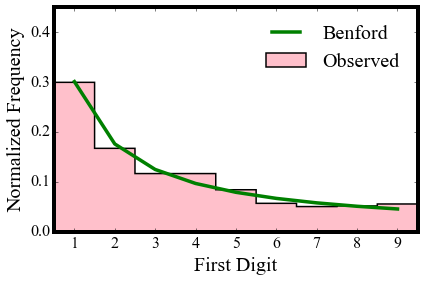

Power_divergenceResult(statistic=0.012890677141930934, pvalue=0.99999999992846267)


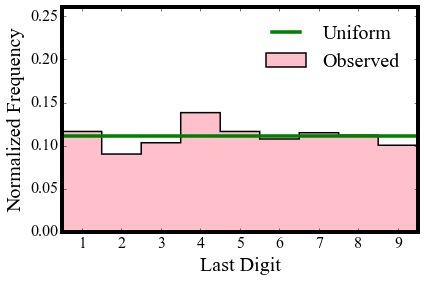

In [11]:
print "first and last digit distribution of the votes transmitted"
plot_first_distrution(first_digits_before_3am + first_digits_after_3am, 'FirstDigitsDist_FullSample', n_expected_first)
plot_last_distrution(last_digits_before_3am + last_digits_after_3am, 'LastDigitsDist_FullSample', n_expected_last)

first and last digit distribution of the votes transmitted before 3am
Power_divergenceResult(statistic=0.021451554472177208, pvalue=0.99999999945326357)


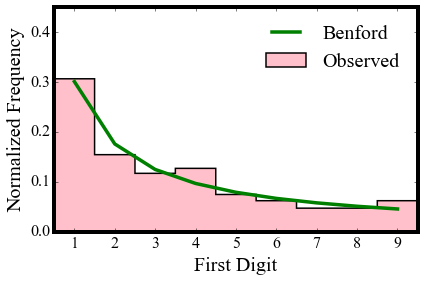

Power_divergenceResult(statistic=0.010518407212622089, pvalue=0.9999999999682575)


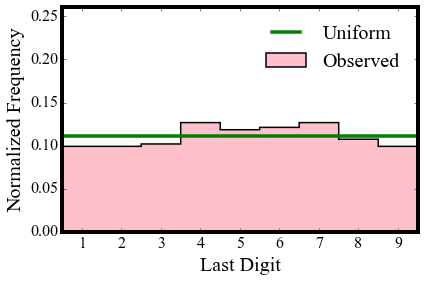

In [12]:
print "first and last digit distribution of the votes transmitted before 3am"
plot_first_distrution(first_digits_before_3am, 'FirstDigitsDist_pre3AM', n_expected_first)
plot_last_distrution(last_digits_before_3am, 'LastDigitsDist_pre3AM', n_expected_last)

Power_divergenceResult(statistic=0.0094698976835995586, pvalue=0.99999999997913569)


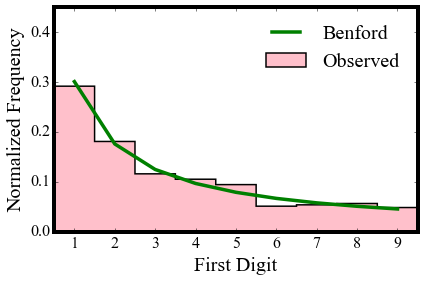

Power_divergenceResult(statistic=0.033950617283950629, pvalue=0.99999999658678751)


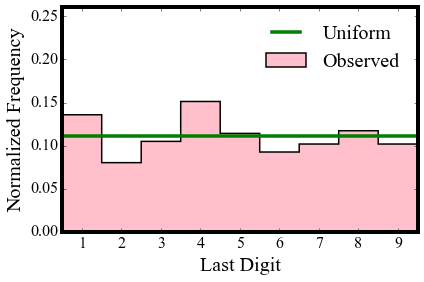

In [13]:
#first and last digit distribution of the votes transmitted after 3am
plot_first_distrution(first_digits_after_3am, 'FirstDigitsDist_post3AM', n_expected_first)
plot_last_distrution(last_digits_after_3am, 'LastDigitsDist_post3AM', n_expected_last)

Power_divergenceResult(statistic=0.056756672098637238, pvalue=0.99999997358312176)


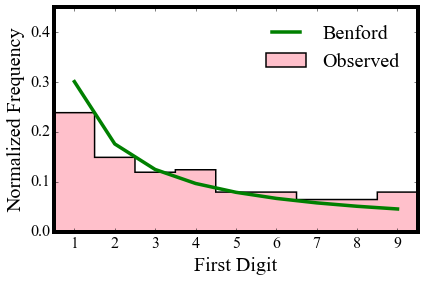

Power_divergenceResult(statistic=0.023333333333333321, pvalue=0.9999999992352433)


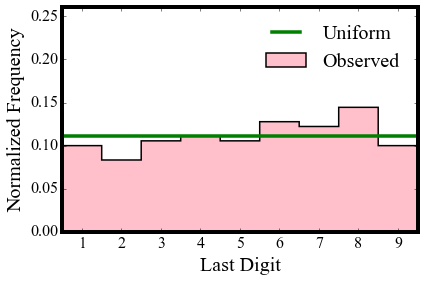

In [14]:
#first and last digit distribution of Leni's votes before 3AM
plot_first_distrution(first_digits_leni_before_3am, 'FirstDigitsDist_pre3AM_leni', n_expected_first)
plot_last_distrution(last_digits_leni_before_3am, 'LastDigitsDist_pre3AM_leni', n_expected_last)

Power_divergenceResult(statistic=0.04288559159278571, pvalue=0.99999999134101325)


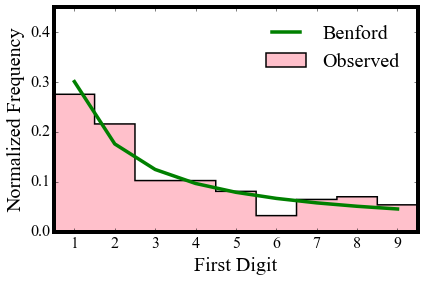

Power_divergenceResult(statistic=0.048925619834710728, pvalue=0.99999998536750645)


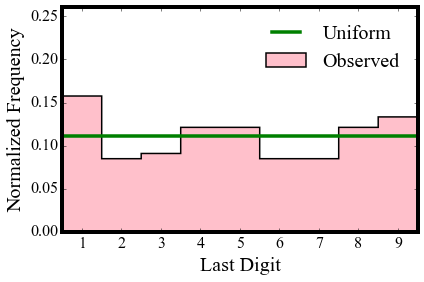

In [15]:
#first and last digit distribution of Leni's votes after 3AM
plot_first_distrution(first_digits_leni_after_3am, 'FirstDigitsDist_post3AM_leni', n_expected_first)
plot_last_distrution(last_digits_leni_after_3am, 'LastDigitsDist_post3AM_leni', n_expected_last)

first and last digit distribution of BBM's votes before 3AM
Power_divergenceResult(statistic=0.06226589461570204, pvalue=0.99999996181800355)


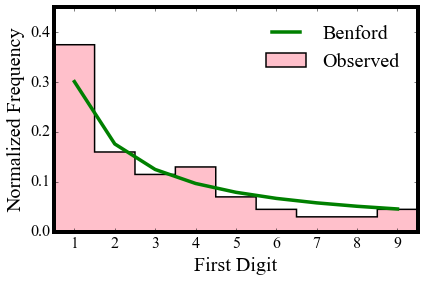

Power_divergenceResult(statistic=0.034936844934157496, pvalue=0.99999999617407787)


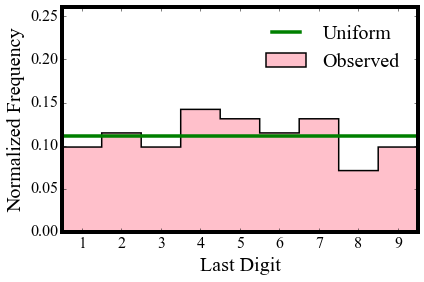

In [16]:
print "first and last digit distribution of BBM's votes before 3AM"
plot_first_distrution(first_digits_bbm_before_3am, 'FirstDigitsDist_pre3AM_bbm', n_expected_first)
plot_last_distrution(last_digits_bbm_before_3am, 'LastDigitsDist_pre3AM_bbm', n_expected_last)

first and last digit distribution of BBM's votes after 3AM
Power_divergenceResult(statistic=0.022649442236611125, pvalue=0.99999999932085115)


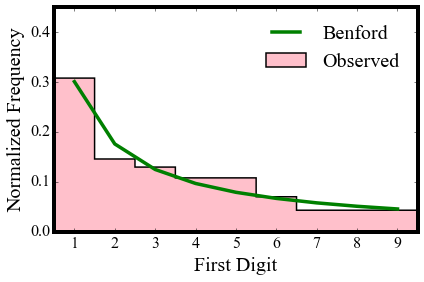

Power_divergenceResult(statistic=0.07547169811320753, pvalue=0.99999991802097488)


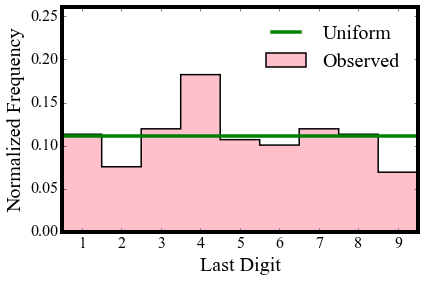

In [17]:
print "first and last digit distribution of BBM's votes after 3AM"
plot_first_distrution(first_digits_bbm_after_3am, 'FirstDigitsDist_post3AM_bbm', n_expected_first)
plot_last_distrution(last_digits_bbm_after_3am, 'LastDigitsDist_post3AM_bbm', n_expected_last)

In [18]:
#generate time partitions
cut_list = [datetime.datetime(2016, 5, 9, 20, 0)]
for i in range(11):
    cut_list.append(cut_list[-1] + datetime.timedelta(hours=2))

#data in time partitions    
partitioned_data = []
for i in range(1, len(cut_list)):
    partitioned_data.append(data[(data.date_time>=cut_list[i-1])&(data.date_time<cut_list[i])])
    
#label partitions
pre_label = np.array([_.strftime("%B %d %I%p") for _ in cut_list])
label = ['{0} to {1}'.format(pre_label[i-1], pre_label[i]) for i in range(1,len(pre_label))]

0
Power_divergenceResult(statistic=0.28475167353377528, pvalue=0.99998471780196607)


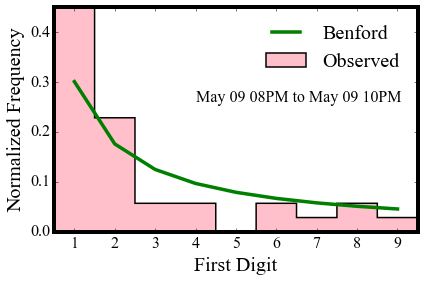

1
Power_divergenceResult(statistic=0.052360940148869752, pvalue=0.99999998083069064)


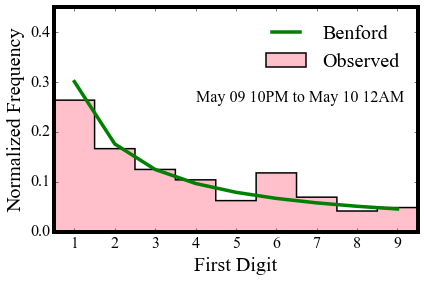

2
Power_divergenceResult(statistic=0.070982512164972408, pvalue=0.99999993573853518)


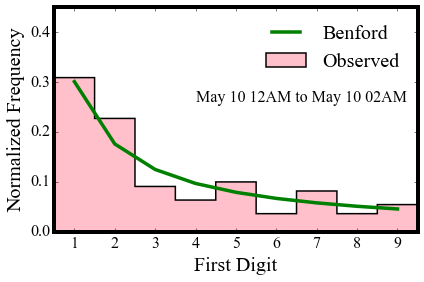

3
Power_divergenceResult(statistic=0.13495612954523162, pvalue=0.99999918149484179)


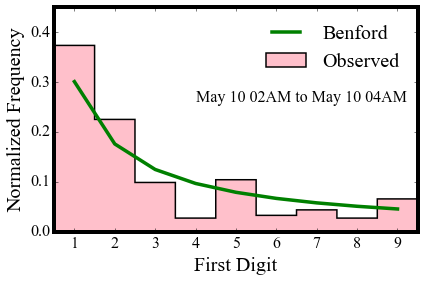

4
Power_divergenceResult(statistic=0.14539319484180901, pvalue=0.99999890195929686)


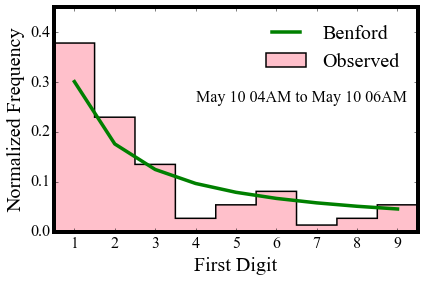

5
Power_divergenceResult(statistic=0.29481511332765076, pvalue=0.9999825103948069)


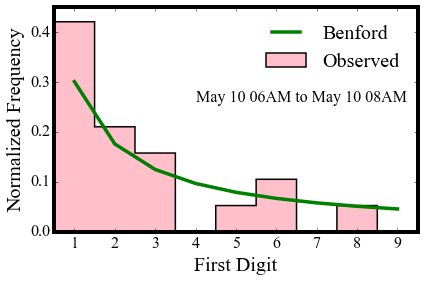

6
Power_divergenceResult(statistic=0.20319321070660712, pvalue=0.99999590675831418)


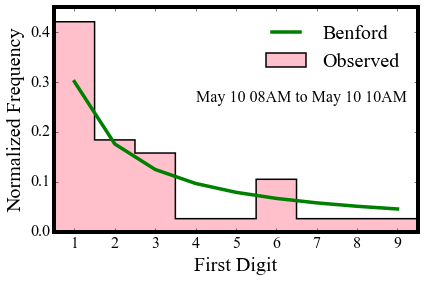

7
Power_divergenceResult(statistic=0.15486388709889362, pvalue=0.99999859200322772)


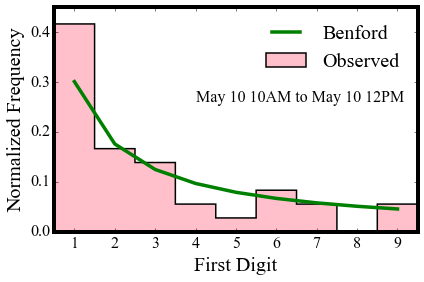

8
Power_divergenceResult(statistic=0.14859564050609872, pvalue=0.99999880350347081)


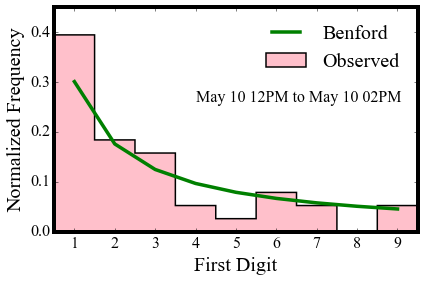

9
Power_divergenceResult(statistic=0.13756718953316716, pvalue=0.99999911720905332)


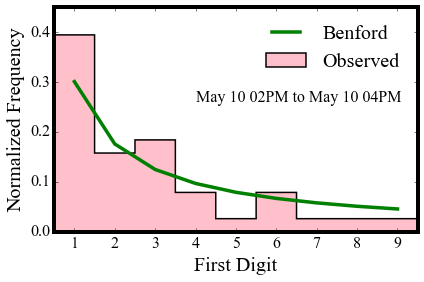

10
Power_divergenceResult(statistic=0.15399580929981044, pvalue=0.99999862283157936)


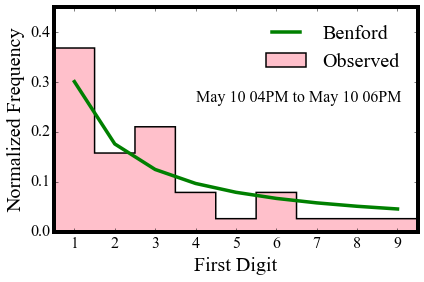

In [19]:
#generate gif
num = 0
for i in partitioned_data:
    print num
    votes = i[i.increment>0]['increment'].tolist()
    first_digits, last_digits = get_digits(votes)
    plot_first_distrution(first_digits, 'first_{0}'.format(num), n_expected_first, label=label[num])
    num = num + 1